<a href="https://colab.research.google.com/github/merajsiddieque/ML-Lab/blob/main/ML_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import zscore


In [2]:
df = pd.read_csv("/content/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [26]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    int64  
 6   guestroom         545 non-null    int64  
 7   basement          545 non-null    int64  
 8   hotwaterheating   545 non-null    int64  
 9   airconditioning   545 non-null    int64  
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    int64  
 12  furnishingstatus  545 non-null    int64  
 13  price_normalized  545 non-null    float64
 14  area_normalized   545 non-null    float64
dtypes: float64(2), int64(13)
memory usage: 64.0 KB


In [4]:
df['furnishingstatus'].unique()


array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [22]:
df.replace({'yes': 1, 'no': 0}, inplace=True)

In [6]:
min_val = df['price'].min()
max_val = df['price'].max()

df['price_normalized'] = (df['price'] - min_val) / (max_val - min_val)

df['price_normalized']


,price_normalized
0,1.000000
1,0.909091
2,0.909091
3,0.906061
4,0.836364
...,...
540,0.006061
541,0.001485
542,0.000000
543,0.000000


In [17]:
df['furnishingstatus'].value_counts()

,count
furnishingstatus,
semi-furnished,227
unfurnished,178
furnished,140


In [23]:
df.replace({'furnished': 2, 'unfurnished': 0, 'semi-furnished':1}, inplace=True)

In [19]:

min_max_scaling = df.copy()

for col in min_max_scaling.select_dtypes(include=['int64', 'float64']).columns:
    min_val = min_max_scaling[col].min()
    max_val = min_max_scaling[col].max()
    min_max_scaling[col] = (min_max_scaling[col] - min_val) / (max_val - min_val)

min_max_scaling.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_normalized,area_normalized
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,1.0,1.000000,0.396564
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,1.0,0.909091,0.502405
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.5,0.909091,0.571134
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,1.0,0.906061,0.402062
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,1.0,0.836364,0.396564


In [20]:
standard_scaling = df.copy()

for col in standard_scaling.select_dtypes(include=['int64', 'float64']).columns:
    mean_val = standard_scaling[col].mean()

    variance = ((standard_scaling[col] - mean_val) ** 2).sum() / (len(standard_scaling[col]) - 1)
    std_val = np.sqrt(variance)

    standard_scaling[col] = (standard_scaling[col] - mean_val) / std_val

standard_scaling.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_normalized,area_normalized
0,4.562174,1.045766,1.402131,1.420507,1.376952,0.405251,-0.464888,-0.733865,-0.219063,1.471267,1.516299,1.803284,1.404995,4.562174,1.045766
1,4.000809,1.755397,1.402131,5.400847,2.529700,0.405251,-0.464888,-0.733865,-0.219063,1.471267,2.676950,-0.553526,1.404995,4.000809,1.755397
2,4.000809,2.216196,0.047235,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,-0.678439,1.516299,1.803284,0.091578,4.000809,2.216196
3,3.982096,1.082630,1.402131,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,1.471267,2.676950,1.803284,1.404995,3.982096,1.082630
4,3.551716,1.045766,1.402131,-0.569663,0.224204,0.405251,2.147110,1.360148,-0.219063,1.471267,1.516299,-0.553526,1.404995,3.551716,1.045766


In [28]:
df_outliers = df.copy()

Q1 = df_outliers.quantile(0.25)
Q3 = df_outliers.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_rows = df_outliers[(df_outliers < lower_bound) | (df_outliers > upper_bound)].dropna(how='all')

print("\nRows with outliers:")
print(outlier_rows)



Rows with outliers:
          price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000.0   NaN       NaN        NaN      NaN       NaN        NaN   
1    12250000.0   NaN       NaN        4.0      4.0       NaN        NaN   
2    12250000.0   NaN       NaN        NaN      NaN       NaN        NaN   
3    12215000.0   NaN       NaN        NaN      NaN       NaN        NaN   
4    11410000.0   NaN       NaN        NaN      NaN       NaN        1.0   
..          ...   ...       ...        ...      ...       ...        ...   
532         NaN   NaN       NaN        NaN      NaN       0.0        NaN   
536         NaN   NaN       5.0        NaN      NaN       0.0        NaN   
539         NaN   NaN       NaN        NaN      NaN       0.0        NaN   
541         NaN   NaN       NaN        NaN      NaN       0.0        NaN   
543         NaN   NaN       NaN        NaN      NaN       0.0        NaN   

     basement  hotwaterheating  airconditioning  parking  prefarea

In [29]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

for col in df.select_dtypes(include=['object', 'category']).columns:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)


/tmp/ipython-input-4042968914.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


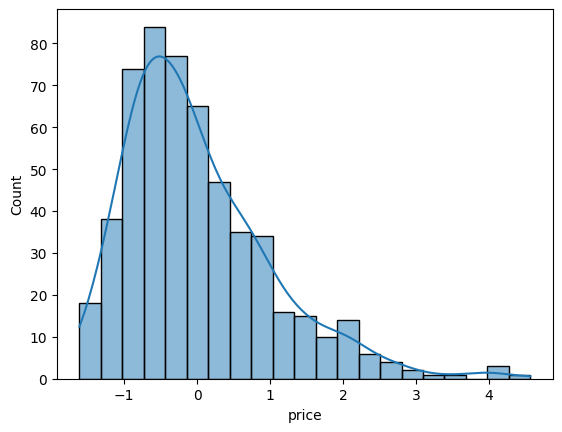

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df[numeric_cols[0]], kde=True)
plt.show()


In [35]:
df2 = pd.read_csv('/content/faa_ai_prelim.csv')
df2.head()

,UPDATED,ENTRY_DATE,EVENT_LCL_DATE,EVENT_LCL_TIME,LOC_CITY_NAME,LOC_STATE_NAME,LOC_CNTRY_NAME,RMK_TEXT,EVENT_TYPE_DESC,FSDO_DESC,...,PAX_INJ_NONE,PAX_INJ_MINOR,PAX_INJ_SERIOUS,PAX_INJ_FATAL,PAX_INJ_UNK,GRND_INJ_NONE,GRND_INJ_MINOR,GRND_INJ_SERIOUS,GRND_INJ_FATAL,GRND_INJ_UNK
0,No,19-Feb-16,19-Feb-16,00:45:00Z,MARSHVILLE,North Carolina,NaN,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",Accident,FAA Charlotte FSDO-68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,19-Feb-16,18-Feb-16,23:55:00Z,TAVERNIER,Florida,NaN,AIRCRAFT ON LANDING WENT OFF THE END OF THE RU...,Incident,FAA Miami FSDO-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,No,19-Feb-16,18-Feb-16,22:14:00Z,TRENTON,New Jersey,NaN,"AIRCRAFT ON FINAL SUSTAINED A BIRD STRIKE, LAN...",Incident,FAA Philadelphia FSDO-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,19-Feb-16,18-Feb-16,17:10:00Z,ASHEVILLE,North Carolina,NaN,"AIRCRAFT ON LANDING, GEAR COLLAPSED, ASHEVILLE...",Incident,FAA Charlotte FSDO-68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,No,19-Feb-16,18-Feb-16,00:26:00Z,TALKEETNA,Alaska,NaN,"AIRCRAFT ON LANDING, NOSE GEAR COLLAPSED, TALK...",Incident,FAA Anchorage FSDO-03,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df2.columns

Index(['UPDATED', 'ENTRY_DATE', 'EVENT_LCL_DATE', 'EVENT_LCL_TIME',
       'LOC_CITY_NAME', 'LOC_STATE_NAME', 'LOC_CNTRY_NAME', 'RMK_TEXT',
       'EVENT_TYPE_DESC', 'FSDO_DESC', 'REGIST_NBR', 'FLT_NBR', 'ACFT_OPRTR',
       'ACFT_MAKE_NAME', 'ACFT_MODEL_NAME', 'ACFT_MISSING_FLAG',
       'ACFT_DMG_DESC', 'FLT_ACTIVITY', 'FLT_PHASE', 'FAR_PART', 'MAX_INJ_LVL',
       'FATAL_FLAG', 'FLT_CRW_INJ_NONE', 'FLT_CRW_INJ_MINOR',
       'FLT_CRW_INJ_SERIOUS', 'FLT_CRW_INJ_FATAL', 'FLT_CRW_INJ_UNK',
       'CBN_CRW_INJ_NONE', 'CBN_CRW_INJ_MINOR', 'CBN_CRW_INJ_SERIOUS',
       'CBN_CRW_INJ_FATAL', 'CBN_CRW_INJ_UNK', 'PAX_INJ_NONE', 'PAX_INJ_MINOR',
       'PAX_INJ_SERIOUS', 'PAX_INJ_FATAL', 'PAX_INJ_UNK', 'GRND_INJ_NONE',
       'GRND_INJ_MINOR', 'GRND_INJ_SERIOUS', 'GRND_INJ_FATAL', 'GRND_INJ_UNK'],
      dtype='object')

In [39]:
df2['DATETIME'] = pd.to_datetime(df2['EVENT_LCL_DATE'].astype(str) + ' ' + df2['EVENT_LCL_TIME'].astype(str), errors='coerce')
print(df2['DATETIME'].head())

0   2016-02-19 00:45:00+00:00
1   2016-02-18 23:55:00+00:00
2   2016-02-18 22:14:00+00:00
3   2016-02-18 17:10:00+00:00
4   2016-02-18 00:26:00+00:00
Name: DATETIME, dtype: datetime64[ns, UTC]


/tmp/ipython-input-1915710246.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['DATETIME'] = pd.to_datetime(df2['EVENT_LCL_DATE'].astype(str) + ' ' + df2['EVENT_LCL_TIME'].astype(str), errors='coerce')
